<a href="https://colab.research.google.com/github/f-flavia/DataCamp/blob/main/Introduction_to_Predictive_Analytics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Structure of the base table

Consider the predictive modeling problem where you want to predict whether a candidate donor will make a donation in the next year. To build the model, you use historical data and calculate the target in 2017. The target is 1 if a donation is made in 2017 and 0 otherwise. Below, the first lines of the base table are given. It contains the number of donations made in 2016, the number of donations made in 2017, the age of the donor and the target. Which columns can be used as candidate predictors?

Donations 2016	Donations 2017	Age	Donation in 2017 (target)

5 2	68	1

3	0	65	0

2	0	23	0

8	6	56	1


Donations 2016 and Age.

Only information before 2017 can be used.

#### Exploring the base table

Before diving into model building, it is important to understand the data you are working with. In this exercise, you will learn how to obtain the population size, number of targets and target incidence from a given basetable.

In [41]:
import pandas as pd
import numpy as np

In [42]:
# Import data
basetable = pd.read_csv('example_basetable.csv')
basetable.head()


,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [43]:
basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target                 25000 non-null  int64  
 1   gender_F               25000 non-null  int64  
 2   income_high            25000 non-null  int64  
 3   income_low             25000 non-null  int64  
 4   country_USA            25000 non-null  int64  
 5   country_India          25000 non-null  int64  
 6   country_UK             25000 non-null  int64  
 7   age                    25000 non-null  int64  
 8   time_since_last_gift   25000 non-null  int64  
 9   time_since_first_gift  25000 non-null  int64  
 10  max_gift               25000 non-null  float64
 11  min_gift               25000 non-null  float64
 12  mean_gift              25000 non-null  float64
 13  number_gift            25000 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.7 MB


In [44]:
# Assign the number of rows in the basetable to the variable 'population_size'.
population_size  = len(basetable)

# Print the population size.
print(population_size)

# Assign the number of targets to the variable 'targets_count'.
targets_count = sum(basetable['target'])

# Print the number of targets.
print(targets_count)

# Print the target incidence.
print(targets_count / population_size)

25000
1187
0.04748


As in many real world predictive modeling cases, the incidence is rather low. This makes model building challenging!

#### Exploring the predictive variables

It is always useful to get a better understanding of the population. Therefore, one can have a closer look at the predictive variables. Recall that you can select a column in a pandas DataFrame by indexing as follows:

basetable["variable"]

To count the number of occurrences of a certain value in a column, you can use the sum method:

sum(basetable["variable"]==value)

In this exercise you will find out whether there are more males than females in the population.

In [45]:
# Count and print the number of females.
print(len(basetable[basetable['gender_F'] == 1]))


# Count and print the number of males.
print(len(basetable[basetable['gender_F'] == 0]))

12579
12421


From these results, you can see that there are more females in the basetable.

#### Interpretation of coefficients

Assume you built a logistic regression model to predict which donors are most likely to donate for a project, using age and time_since_last_gift (number of months since the last gift) as predictors. The output of the logistic regression model is as follows:

y = 0.3 + 4.5*age - 2.3*time_since_last_gift

Which of the following statements holds, according to the model?

Older donors that recently donated are most likely to donate.

By looking at the coefficients you can see that age is positively correlated with the target, and time since last gift negatively.

#### Building a logistic regression model

You can build a logistic regression model using the module linear_model from sklearn. First, you create a logistic regression model using the LogisticRegression() method:

logreg = linear_model.LogisticRegression()

Next, you need to feed data to the logistic regression model, so that it can be fit. X contains the predictive variables, whereas y has the target.

X = basetable[["predictor_1","predictor_2","predictor_3"]]`

y = basetable[["target"]]

logreg.fit(X,y)

In this exercise you will build your first predictive model using three predictors.

In [46]:
# Import linear_model from sklearn.
from sklearn import linear_model

# Create a DataFrame X that only contains the candidate predictors age, gender_F and time_since_last_gift.
X = basetable[['age', 'gender_F', 'time_since_last_gift']]

# Create a DataFrame y that contains the target.
y = basetable[['target']]

# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Showing the coefficients and intercept
Once the logistic regression model is ready, it can be interesting to have a look at the coefficients to check whether the model makes sense.

Given a fitted logistic regression model logreg, you can retrieve the coefficients using the attribute coef_. The order in which the coefficients appear, is the same as the order in which the variables were fed to the model. The intercept can be retrieved using the attribute intercept_.

In [47]:
# Construct a logistic regression model that predicts the target using age, gender_F and time_since_last gift
predictors = ["age","gender_F","time_since_last_gift"]
X = basetable[predictors]
y = basetable[["target"]]
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(predictors,list(coef[0])):
    print(p + '\t' + str(c))
    
# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

age	0.007801469599031016
gender_F	0.10964341264667467
time_since_last_gift	-0.0012872607039948081
[-2.59072469]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The coefficient of gender_F is positive, meaning that women are more likely to donate.

#### Making predictions
Once your model is ready, you can use it to make predictions for a campaign. It is important to always use the latest information to make predictions.

In this exercise you will, given a fitted logistic regression model, learn how to make predictions for a new, updated basetable.

In [48]:
# Fit a logistic regression model
from sklearn import linear_model
X = basetable[["age","gender_F","time_since_last_gift"]]
y = basetable[["target"]]
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)

# Create a DataFrame new_data from current_data that has only the relevant predictors 
new_data = basetable[["age","gender_F","time_since_last_gift"]]

# Make a prediction for each observation in new_data and assign it to predictions
predictions = logreg.predict_proba(new_data)
print(predictions[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.93439418 0.06560582]
 [0.94519285 0.05480715]
 [0.92097941 0.07902059]
 [0.95296422 0.04703578]
 [0.94672824 0.05327176]]


The predictions consist of two values. The second value is the probability that the observation is a target.

#### Donor that is most likely to donate
The predictions that result from the predictive model reflect how likely it is that someone is a target. For instance, assume that you constructed a model to predict whether a donor will donate more than 50 Euro for a certain campaign. If the prediction for a certain donor is 0.82, it means that there is an 82% chance that he will donate more than 50 Euro.

In this exercise you will find the donor that is most likely to donate more than 50 Euro.

Recall that you can sort a pandas DataFrame df according to a certain column c using

df_sorted = df.sort_values(["c"])

and that you can select the first and last row of a pandas DataFrame using

first_row = df.head(1)

last_row = df.tail(1)

In [49]:
# Create dataframe predictions
predictions = pd.DataFrame(predictions)

# Rename column
predictions.columns = ['0', 'probability']

print(predictions)

              0  probability
0      0.934394     0.065606
1      0.945193     0.054807
2      0.920979     0.079021
3      0.952964     0.047036
4      0.946728     0.053272
...         ...          ...
24995  0.923354     0.076646
24996  0.952576     0.047424
24997  0.956548     0.043452
24998  0.959632     0.040368
24999  0.978607     0.021393

[25000 rows x 2 columns]


In [50]:
predictions = pd.DataFrame(predictions)
# Sort the predictions
predictions_sorted = predictions.sort_values(['probability'])

# Print the row of predictions_sorted that has the donor that is most likely to donate
print(predictions_sorted.tail(1))

              0  probability
18873  0.850223     0.149777


The donor that is most likely to donate still has a rather low probability to donate, this is due to the fact that the overal target incidence is low.

#### Calculating AUC
The AUC value assesses how well a model can order observations from low probability to be target to high probability to be target. In Python, the roc_auc_score function can be used to calculate the AUC of the model. It takes the true values of the target and the predictions as arguments.

In [51]:
# import roc_auc_score
from sklearn.metrics import roc_auc_score

# Make predictions
predictions = logreg.predict_proba(X)
predictions_target = predictions[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, predictions_target)
print(round(auc,2))

0.63


An AUC of 0.63 is a typical result for this type of cases. Let's check if we can improve using different sets of variables.

####Using different sets of variables
Adding more variables and therefore more complexity to your logistic regression model does not automatically result in more accurate models. In this exercise you can verify whether adding 3 variables to a model leads to a more accurate model.

In [52]:
# Create dataframe
#variables_1 = basetable[['mean_gift', 'income_low']]
#variables_2 = basetable[['mean_gift', 'income_low', 'gender_F', 'country_India', 'age']]

In [53]:
# Create appropriate DataFrames
X_1 = basetable[['mean_gift', 'income_low']]
X_2 = basetable[['mean_gift', 'income_low', 'gender_F', 'country_India', 'age']]
y = basetable[["target"]]

# Create the logistic regression model
logreg = linear_model.LogisticRegression()

# Make predictions using the first set of variables and assign the AUC to auc_1
logreg.fit(X_1, y)
predictions_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(y, predictions_1)

# Make predictions using the second set of variables and assign the AUC to auc_2
logreg.fit(X_2, y)
predictions_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(y, predictions_2)

# Print auc_1 and auc_2
print(round(auc_1,2))
print(round(auc_2,2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.68
0.69


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You can see that the model with 5 variables has the same AUC as the model using only 2 variables. Adding more variables doesn't always increase the AUC.

#### Selecting the next best variable
The forward stepwise variable selection method starts with an empty variable set and proceeds in steps, where in each step the next best variable is added. To implement this procedure, two handy functions have been implemented for you.

The auc function calculates for a given variable set variables the AUC of the model that uses this variable set as predictors. The next_best function calculates which variable should be added in the next step to the variable list.

In this exercise, you will experiment with these functions to better understand their purpose. You will calculate the AUC of a given variable set, calculate which variable should be added next, and verify that this indeed results in an optimal AUC.

In [54]:
# Implementation of the AUC function
def auc(variables, target, basetable):    
    X = basetable[variables]    
    y = basetable[target]    
    logreg = linear_model.LogisticRegression()    
    logreg.fit(X, y)    
    predictions = logreg.predict_proba(X)[:,1]    
    auc = roc_auc_score(y, predictions)
    return(auc)

In [55]:
# Calculating the next best variable
def next_best(current_variables,candidate_variables, target, basetable):    
    best_auc = -1    
    best_variable = None
    for v in candidate_variables:        
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:            
            best_auc = auc_v            
            best_variable = v
    return best_variable

In [56]:
# Calculate the AUC of a model that uses "max_gift", "mean_gift" and "min_gift" as predictors
auc_current = auc(["max_gift", "mean_gift", "min_gift"], ["target"], basetable)
print(round(auc_current,4))

# Calculate which variable among "age" and "gender_F" should be added to the variables "max_gift", "mean_gift" and "min_gift"
next_variable = next_best(["max_gift", "mean_gift", "min_gift"], ["age", "gender_F"], ["target"], basetable)
print(next_variable)

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "age" as predictors
auc_current_age = auc(["max_gift", "mean_gift", "min_gift", "age"], ["target"], basetable)
print(round(auc_current_age,4))

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "gender_F" as predictors
auc_current_gender_F = auc(["max_gift", "mean_gift", "min_gift", "gender_F"], ["target"], basetable)
print(round(auc_current_gender_F,4))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7126


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


age


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7149
0.7131


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model that has age as next variable has a better AUC than the model that has gender_F as next variable. Therefore, age is selected as the next best variable.

#### Finding the order of variables
The forward stepwise variable selection procedure starts with an empty set of variables, and adds predictors one by one. In each step, the predictor that has the highest AUC in combination with the current variables is selected.

In this exercise you will learn to implement the forward stepwise variable selection procedure. To this end, you can use the next_best function that has been implemented for you. It can be used as follows:

next_best(current_variables,candidate_variables,target,basetable)

where current_variables is the list of variables that is already in the model and candidate_variables the list of variables that can be added next.

In [57]:
# Find the candidate variables
candidate_variables = list(basetable.columns.values)
candidate_variables.remove("target")

# Initialize the current variables
current_variables = []

# The forward stepwise variable selection procedure
number_iterations = 5
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, ["target"], basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Variable added in step 1 is max_gift.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Variable added in step 2 is number_gift.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Variable added in step 3 is time_since_last_gift.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Variable added in step 4 is mean_gift.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

Variable added in step 5 is age.
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age']


DataCamp result:
<script.py> output:
    Variable added in step 1 is number_gift.

    Variable added in step 2 is age.
    
    Variable added in step 3 is min_gift.
    
    Variable added in step 4 is time_since_last_gift.
    
    Variable added in step 5 is income_low.
    
    ['number_gift', 'age', 'min_gift', 'time_since_last_gift', 'income_low']

#### Correlated variables
The first 10 variables that are added to the model are the following:

['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'income_high', 'age', 'country_USA', 'gender_F', 'income_low', 'country_UK']

As you can see, min_gift is not added. Does this mean that it is a bad variable? You can test the performance of the variable by using it in a model as a single variable and calculating the AUC. How does the AUC of min_gift compare to the AUC of income_high? To this end, you can use the function auc():

auc(variables, target, basetable)

It can happen that a good variable is not added because it is highly correlated with a variable that is already in the model. You can test this calculating the correlation between these variables:

import numpy

numpy.corrcoef(basetable["variable_1"],basetable["variable_2"])[0,1]

In [58]:
# Calculate the AUC of the model using min_gift only
auc_min_gift = auc(['min_gift'], ["target"], basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(['income_high'], ["target"], basetable)
print(round(auc_income_high,2))

# Calculate the correlation between min_gift and mean_gift
correlation = np.corrcoef(basetable["min_gift"], basetable["mean_gift"])[0,1]
print(round(correlation,2))

0.57
0.52
0.76


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You can observe that min_gift has more predictive power than income_high, but that it is highly correlated with mean_gift and therefore not included in the selected variables.

#### Partitioning

In order to properly evaluate a model, one can partition the data in a train and test set. The train set contains the data the model is built on, and the test data is used to evaluate the model. This division is done randomly, but when the target incidence is low, it could be necessary to stratify, that is, to make sure that the train and test data contain an equal percentage of targets.

In this exercise you will partition the data with stratification and verify that the train and test data have equal target incidence. The train_test_split method has already been imported, and the X and y DataFrames are available in your workspace.

In [59]:
# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop("target", 1)
y = basetable["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train['target'])/len(train), 2))
print(round(sum(test['target'])/len(test), 2))

0.05
0.05


<ipython-input-59-169617f28132>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = basetable.drop("target", 1)


The stratify option makes sure the target incidence is the same in both train and test.

#### Evaluating a model on test and train
The function auc_train_test calculates the AUC of model that is built on a train set and evaluated on a test set:

auc_train, auc_test = auc_train_test(variables, target, train, test)

with variables a list of the names of the variables that is used in the model.

In this exercise, you will apply this function, and check whether the train and test AUC are similar.

In [60]:
# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop('target', 1)
y = basetable["target"]

# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

auc_train = auc(["age", "gender_F"], "target", train)
auc_test = auc(["age", "gender_F"], "target", test)

print(round(auc_train,2))
print(round(auc_test,2))

0.54
0.54


<ipython-input-60-7a2dd87bff3e>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = basetable.drop('target', 1)


#### Building the AUC curves
The forward stepwise variable selection procedure provides an order in which variables are optimally added to the predictor set. In order to decide where to cut off the variables, you can make the train and test AUC curves. These curves plot the train and test AUC using the first, first two, first three, … variables in the model.

In this exercise you will learn to plot these AUC curves. The method auc_train_test to calculate the AUC values has been implemented for you and can be used as follows:

auc_train, auc_test = auc_train_test(variables, target, train, test)

where variables is the set of variables used in the logistic regression model, target is a list with the target name, and train and test are the train and test basetable respectively.

The variables ordered according to the forward stepwise procedure are given in the list variables. You can explore it in the console. Additionally, three empty lists have been defined for you:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

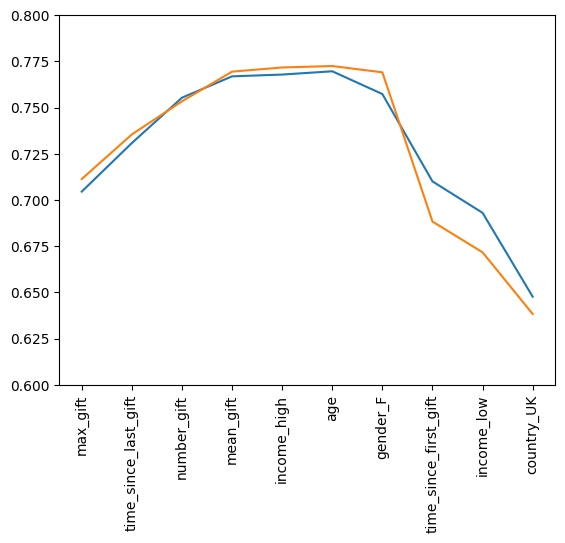

In [61]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

variables = ['max_gift',
 'time_since_last_gift',
 'number_gift',
 'mean_gift',
 'income_high',
 'age',
 'gender_F',
 'time_since_first_gift',
 'income_low',
 'country_UK']

# Iterate over the variables in variables
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train = auc(variables_evaluate, "target", train)
    auc_test = auc(variables_evaluate, "target", test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
    # Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

Note that the test AUC curve starts declining sooner than the train curve. The point at which this happens is a good cut-off.

# About the graph above
Deciding the cut-off
The forward stepwise variable selection results in the following AUC values. How many variables should be included in the model?

8 variables, the test AUC does not increase after this point and it is better to have less complex models.



#### Constructing the cumulative gains curve
The cumulative gains curve is an evaluation curve that assesses the performance of your model. It shows the percentage of targets reached when considering a certain percentage of your population with the highest probability to be target according to your model.

To construct this curve, you can use the .plot_cumulative_gain() method in the scikitplot module and the matplotlib.pyplot module. As for each model evaluation metric or curve, you need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = basetable[["age", "gender_F", "time_since_last_gift"]]
y = basetable[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


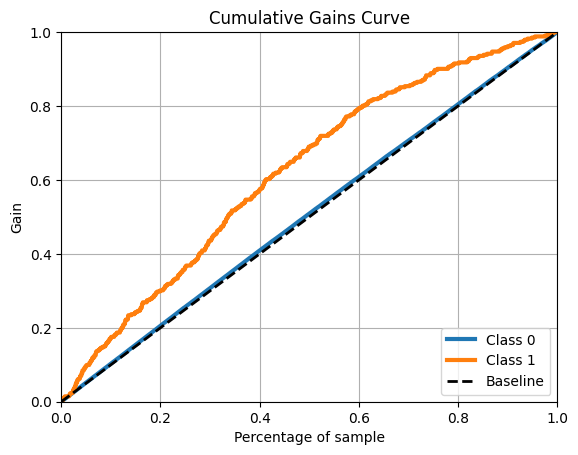

In [64]:
# Import the matplotlib.pyplot module 
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, pred) #replace targets_test by
plt.show()

#### A random model
In this exercise you will reconstruct the cumulative gains curve's baseline, that is, the cumulative gains curve of a random model.

To do so, you need to construct random predictions. The plot_cumulative_gain method requires two values for these predictions: one for the target to be 0 and one for the target to be 1. These values should sum to one, so a valid list of predictions could for instance be [(0.02,0.98),(0.27,0.73),...,(0.09,0.91)].

In Python, you can generate a random value between values a and b as follows:

import random

random_value = random.uniform(a,b)

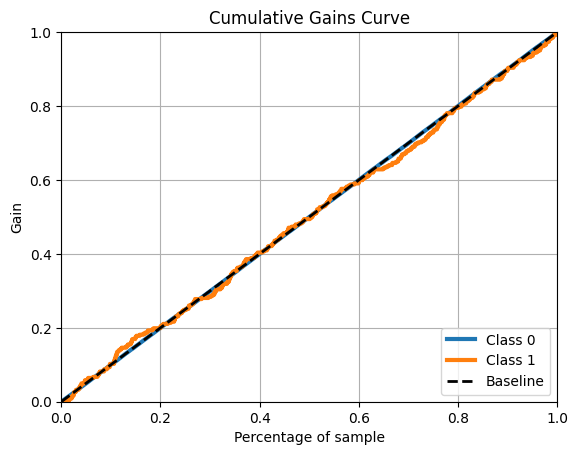

In [65]:
# Import the modules
import random
import matplotlib.pyplot as plt

# Generate random predictions
random_predictions = [random.uniform(0,1) for _ in range(len(y_test))]

# Adjust random predictions
random_predictions = [(r, 1 - r) for r in random_predictions]

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, random_predictions)
plt.show()

#### Constructing the lift curve
The lift curve is an evaluation curve that assesses the performance of your model. It shows how many times more than average the model reaches targets.

To construct this curve, you can use the plot_lift_curve method in the scikitplot module and the matplotlib.pyplot module. As for each model evaluation metric or curve, you need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

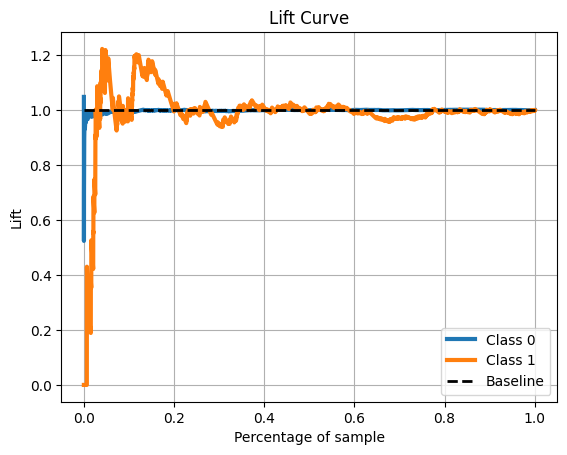

In [66]:
# Import the matplotlib.pyplot module 
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, random_predictions)
plt.show()

#### A perfect model
In this exercise you will reconstruct the lift curve of a perfect model. To do so, you need to construct perfect predictions.

Recall that the plot_lift_curve method requires two values for the predictions argument: the first argument for the target to be 0 and the second one for the target to be 1.

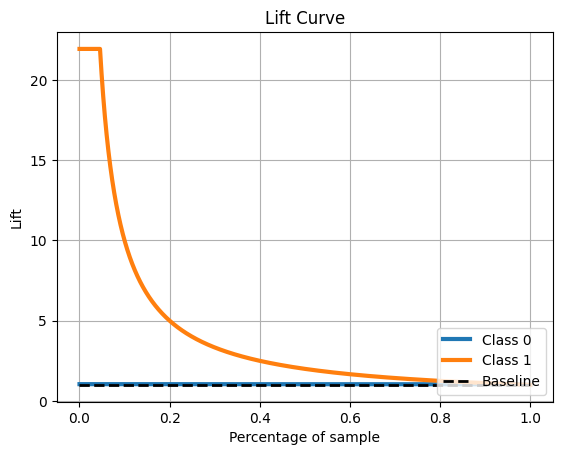

In [67]:
# Generate perfect predictions
perfect_predictions = [(1-target , target) for target in y_test["target"]]

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, perfect_predictions)
plt.show()

You can observe that the lift is first 20, which is normal as there are 5% targets: you can only have 20 times more than average targets. After that the lift gradually decreases because there are no targets to add anymore.

#### Business case using lift curve
In the video you learned to implement a method that calculates the profit of a campaign:

profit = profit(perc_targets, perc_selected, population_size, campaign_cost, campaign_reward)

In this method, perc_targets is the percentage of targets in the group that you select for your campaign, perc_selected the percentage of people that is selected for the campaign, population_size the total population size, campaign_cost the cost of addressing a single person for the campaign, and campaign_reward the reward of addressing a target.

In this exercise you will learn for a specific case whether it is useful to use a model, by comparing the profit that is made when addressing all donors versus the top 40% of the donors.

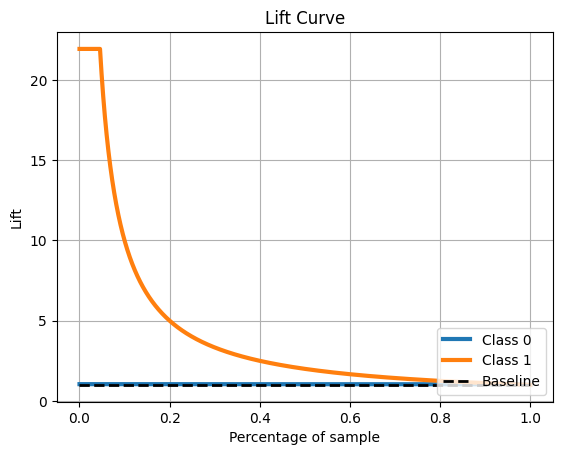

0.0
20000.0


In [68]:
# Plot the lift graph
skplt.metrics.plot_lift_curve(y_test, perfect_predictions)
plt.show()

# Read the lift at 40% (round it up to the upper tenth)
perc_selected = 0.4
lift = 1.5

# Information about the campaign
population_size, target_incidence, campaign_cost, campaign_reward = 100000, 0.01, 1, 100

# Profit in function of the percentage of targets and percentage of population reached
def profit(perc_targets, perc_selected, population_size, campaign_cost, campaign_reward):
    cost = perc_selected * population_size * campaign_cost
    reward = perc_targets * perc_selected * population_size * campaign_reward
    return(reward - cost)
        
# Profit if all donors are targeted
profit_all = profit(target_incidence, 1, population_size, campaign_cost, campaign_reward)
print(profit_all)

# Profit if top 40% of donors are targeted
profit_40 = profit(lift * target_incidence, 0.4, population_size, campaign_cost, campaign_reward)
print(profit_40)

When addressing the entire donor base, you do not make any profit at all. When using the predictive model, you can make 20,000 Euro profit!

#### Business case using cumulative gains curve
The cumulative gains graph can be used to estimate how many donors one should address to make a certain profit. Indeed, the cumulative gains graph shows which percentage of all targets is reached when addressing a certain percentage of the population. If one knows the reward of a campaign, it follows easily how many donors should be targeted to reach a certain profit.

In this exercise, you will calculate how many donors you should address to obtain a 30 000 Euro profit.

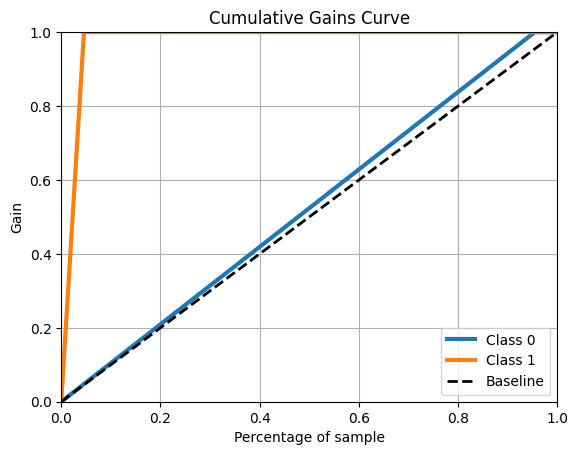

In [69]:
# O GRÁFICA ESTÁ DIFERENTE DA DATACAMP*******
# Plot the cumulative gains
skplt.metrics.plot_cumulative_gain(y_test, perfect_predictions)
plt.show()

# Information about the campaign
population_size = 10000
target_incidence = 0.10

# Number of targets you want to reach
number_targets_toreach = 30000 / 50
perc_targets_toreach = number_targets_toreach / (target_incidence*population_size)
cumulative_gains = 0.4
number_donors_toreach = cumulative_gains * population_size

It looks like you need to address 4,000 donors!

#### Retrieving information from the predictor insight table
The predictor insight graph table contains all the information needed to construct the predictor insight graph. For each value the predictor takes, it has the number of observations with this value and the target incidence within this group. The predictor insight graph table of the predictor Country is loaded as a pandas object pig_table. You can access elements using indexing. For instance, to retrieve the target incidence of donors living in the UK, you can use:

pig_table["Incidence"][pig_table["Country"]=="UK"]

In [70]:
# Create a dataframe
pig_table = pd.DataFrame({'Country':['India','UK','USA'], 'Size':[49849,10057,40094], 'Incidence':[0.05,0.05,0.05]})
pig_table

,Country,Size,Incidence
0,India,49849,0.05
1,UK,10057,0.05
2,USA,40094,0.05


In [71]:
# Inspect the predictor insight graph table of Country
print(pig_table)

# Print the number of UK donors
print(pig_table["Size"][pig_table["Country"]=="UK"])

# Check the target incidence of USA and India donors
print(pig_table["Incidence"][pig_table["Country"]=="USA"])
print(pig_table["Incidence"][pig_table["Country"]=="India"])

  Country   Size  Incidence
0   India  49849       0.05
1      UK  10057       0.05
2     USA  40094       0.05
1    10057
Name: Size, dtype: int64
2    0.05
Name: Incidence, dtype: float64
0    0.05
Name: Incidence, dtype: float64


The target incidence of USA and India donors is the same, indicating that country is not a good variable to predict donations.

###Discretization of a certain variable
In order to make predictor insight graphs for continuous variables, you first need to discretize them. In Python, you can discretize pandas columns using the qcut method.

To check whether the variable was nicely discretized, you can verify that the bins have equal size using the groupby method:

print(basetable.groupby("discretized_variable").size()

In [72]:
# Discretize the variable time_since_last_donation in 10 bins
basetable["bins_recency"] = pd.qcut(basetable['time_since_last_gift'],10)

# Print the group sizes of the discretized variable
print(basetable.groupby("bins_recency").size())

bins_recency
(31.999, 315.0]     2509
(315.0, 459.0]      2492
(459.0, 571.0]      2506
(571.0, 656.0]      2538
(656.0, 736.0]      2461
(736.0, 832.0]      2501
(832.0, 931.0]      2507
(931.0, 1047.0]     2499
(1047.0, 1211.0]    2498
(1211.0, 2305.0]    2489
dtype: int64


The variable is binned in 10 bins that have each about 10 000 observations in it!

#### Making clean cuts
The qcut method divides the variable in n_bins equal bins. In some cases, however, it is nice to choose your own bins. The method cut in python allows you to choose your own bins.

In [73]:
# Discretize the variable 
basetable["disc_number_gift"] = pd.cut(basetable['number_gift'],[0,5,10, 20])

# Count the number of observations per group
print(basetable.groupby("disc_number_gift").size())

disc_number_gift
(0, 5]      13808
(5, 10]     10220
(10, 20]      972
dtype: int64


Notice that the bins aren't approximately equally sized anymore.